In [2]:
# from sklearn.metrics import roc_curve, roc_auc_score, auc

from sklearn.metrics import (precision_score, recall_score, confusion_matrix, roc_curve, roc_auc_score, auc,
                            precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay, accuracy_score,
                            f1_score, classification_report
                            )
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier

# from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
# from sklearn.metrics import (accuracy_score, f1_score, precision_score, classification_report,
#                              recall_score)
# from sklearn.metrics import (precision_recall_curve, PrecisionRecallDisplay)
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [3]:
datasets = pd.read_csv('MFCCs-Updated.csv', header=0)
datasets = datasets.dropna()
print(datasets.shape)
print(list(datasets.columns))

(25000, 42)
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41']


In [4]:
datasets.tail()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
24995,LA_T_9460748,-298.937836,128.792694,-26.289520,31.672287,-4.979138,3.794875,-6.443639,-2.645841,-5.729691,...,-4.306512,-4.319907,-5.469800,-5.715907,-6.044435,-8.096788,-7.811473,-6.253359,-5.456005,Fake
24996,LA_T_9509346,-303.584656,110.672813,-13.097857,48.215343,-8.672078,13.262146,-10.546948,6.460403,-3.590067,...,-6.375105,-6.719627,-6.358214,-6.735151,-6.649095,-5.490253,-6.536967,-4.108762,-4.322256,Fake
24997,LA_T_9536794,-396.684418,78.830780,-1.030774,22.697020,8.658031,6.514871,3.349543,2.490198,-0.886649,...,-4.796082,-3.781118,-4.016378,-4.385901,-4.413742,-5.731325,-6.143722,-5.462499,-4.557004,Fake
24998,LA_T_9548139,-400.428802,101.519951,3.002407,32.867195,2.754524,4.941706,-0.573639,-0.525463,-3.446053,...,-5.609780,-5.037090,-4.239056,-5.851591,-6.047905,-6.164297,-6.530484,-6.383274,-5.378807,Fake
24999,LA_T_9592171,-333.576141,124.783234,-24.541431,43.165745,3.752144,-2.818946,-2.048563,-5.510033,-11.580466,...,-4.845283,-3.601901,-5.621472,-10.405339,-10.334982,-8.055922,-2.809798,-4.262069,-8.885606,Fake


In [5]:
X = datasets.iloc[:, 1:41].values
Y = datasets.iloc[:, 41].values

# # Splitting the dataset into the Training set and Test set
# # Split Data Set into Traning and testing Data Set
# # 888888888888888888888888888888888888888888888888888888
# train_data =ds.sample(frac=0.8,random_state=200) #random state is a seed value
# test_data =ds.drop(train_data.index)
# # print(test_data)
# # Save True value to File
# result_set=test_data['label'].to_frame()


X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.30, random_state = 42)

# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)
#print(Y_Train)

0.9254666666666667
[[6615  128]
 [ 431  326]]


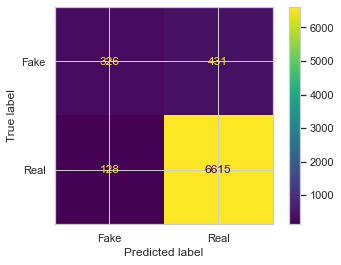

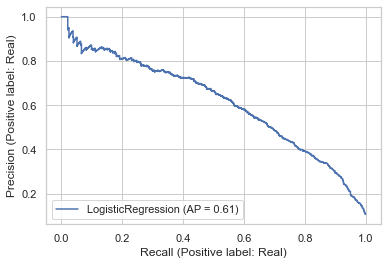

              precision    recall  f1-score   support

        Fake       0.94      0.98      0.96      6743
        Real       0.72      0.43      0.54       757

    accuracy                           0.93      7500
   macro avg       0.83      0.71      0.75      7500
weighted avg       0.92      0.93      0.92      7500



In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, max_iter=1000)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)

print(accuracy)
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

# Making the Confusion Matrix 

cm_PAC = confusion_matrix(Y_Test,Y_Pred, labels=['Real','Fake'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_PAC,display_labels=classifier.classes_)
disp.plot()
PrecisionRecallDisplay.from_estimator(classifier,X_Test,Y_Test)
plt.show()

print(classification_report(Y_Test,Y_Pred))


0.9456
[[6688   55]
 [ 353  404]]


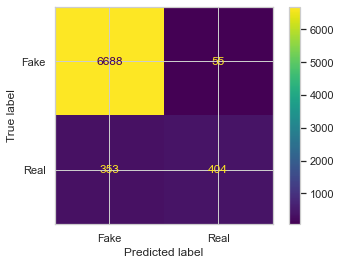

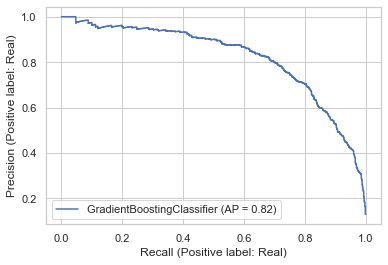

              precision    recall  f1-score   support

        Fake       0.95      0.99      0.97      6743
        Real       0.88      0.53      0.66       757

    accuracy                           0.95      7500
   macro avg       0.92      0.76      0.82      7500
weighted avg       0.94      0.95      0.94      7500



In [6]:
classifier = GradientBoostingClassifier(random_state=0)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)

print(accuracy)
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

# Making the Confusion Matrix 

cm_PAC = confusion_matrix(Y_Test,Y_Pred, labels=['Fake','Real'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_PAC,display_labels=classifier.classes_)
disp.plot()

Y_Test_b=pd.get_dummies(Y_Test)
Y_Test_b=Y_Test_b.drop(["Real"],axis=1)
Y_Pred_b=pd.get_dummies(Y_Pred)
Y_Pred_b=Y_Pred_b.drop(["Real"],axis=1)
#PrecisionRecallDisplay.from_predictions(Y_Test_b, Y_Pred_b)
PrecisionRecallDisplay.from_estimator(classifier,X_Test,Y_Test)

plt.show()

print(classification_report(Y_Test,Y_Pred))

In [ ]:
classifier = SVC(kernel='linear',probability=True)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)

print(accuracy)
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

# Making the Confusion Matrix 

cm_PAC = confusion_matrix(Y_Test,Y_Pred, labels=['Fake','Real'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_PAC,display_labels=classifier.classes_)
disp.plot()

Y_Test_b=pd.get_dummies(Y_Test)
Y_Test_b=Y_Test_b.drop(["Real"],axis=1)
Y_Pred_b=pd.get_dummies(Y_Pred)
Y_Pred_b=Y_Pred_b.drop(["Real"],axis=1)
#PrecisionRecallDisplay.from_predictions(Y_Test_b, Y_Pred_b)
PrecisionRecallDisplay.from_estimator(classifier,X_Test,Y_Test)

plt.show()

print(classification_report(Y_Test,Y_Pred))

0.9268
[[6460  283]
 [ 266  491]]


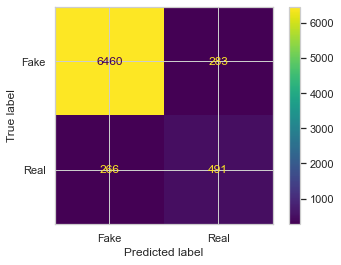

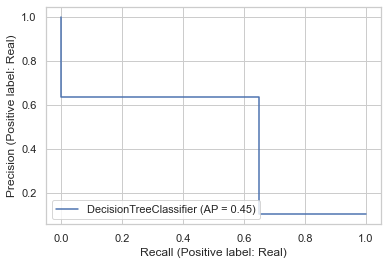

              precision    recall  f1-score   support

        Fake       0.96      0.96      0.96      6743
        Real       0.63      0.65      0.64       757

    accuracy                           0.93      7500
   macro avg       0.80      0.80      0.80      7500
weighted avg       0.93      0.93      0.93      7500



In [7]:
classifier = DecisionTreeClassifier()
classifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)

print(accuracy)
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

# Making the Confusion Matrix 

cm_PAC = confusion_matrix(Y_Test,Y_Pred, labels=['Fake','Real'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_PAC,display_labels=classifier.classes_)
disp.plot()

Y_Test_b=pd.get_dummies(Y_Test)
Y_Test_b=Y_Test_b.drop(["Real"],axis=1)
Y_Pred_b=pd.get_dummies(Y_Pred)
Y_Pred_b=Y_Pred_b.drop(["Real"],axis=1)
#PrecisionRecallDisplay.from_predictions(Y_Test_b, Y_Pred_b)
PrecisionRecallDisplay.from_estimator(classifier,X_Test,Y_Test)

plt.show()

print(classification_report(Y_Test,Y_Pred))

0.9626666666666667
[[6734    9]
 [ 271  486]]


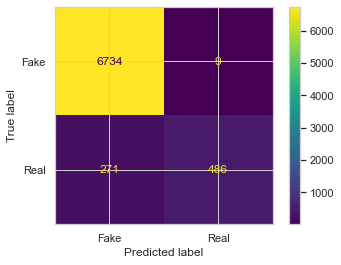

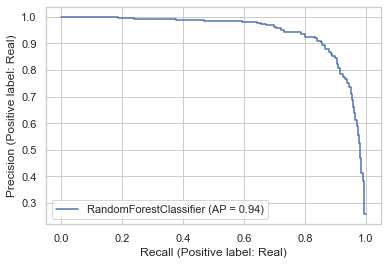

              precision    recall  f1-score   support

        Fake       0.96      1.00      0.98      6743
        Real       0.98      0.64      0.78       757

    accuracy                           0.96      7500
   macro avg       0.97      0.82      0.88      7500
weighted avg       0.96      0.96      0.96      7500



In [8]:
classifier = RandomForestClassifier()
classifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)

print(accuracy)
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

# Making the Confusion Matrix 

cm_PAC = confusion_matrix(Y_Test,Y_Pred, labels=['Fake','Real'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_PAC,display_labels=classifier.classes_)
disp.plot()

Y_Test_b=pd.get_dummies(Y_Test)
Y_Test_b=Y_Test_b.drop(["Real"],axis=1)
Y_Pred_b=pd.get_dummies(Y_Pred)
Y_Pred_b=Y_Pred_b.drop(["Real"],axis=1)
#PrecisionRecallDisplay.from_predictions(Y_Test_b, Y_Pred_b)
PrecisionRecallDisplay.from_estimator(classifier,X_Test,Y_Test)

plt.show()

print(classification_report(Y_Test,Y_Pred))

0.93
[[6594  149]
 [ 376  381]]


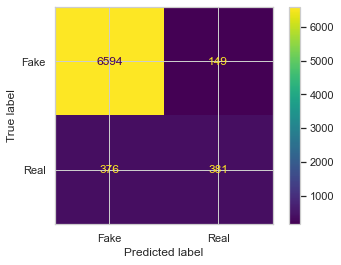

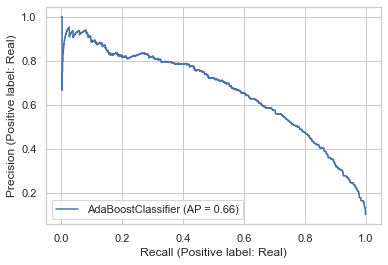

              precision    recall  f1-score   support

        Fake       0.95      0.98      0.96      6743
        Real       0.72      0.50      0.59       757

    accuracy                           0.93      7500
   macro avg       0.83      0.74      0.78      7500
weighted avg       0.92      0.93      0.92      7500



In [9]:
classifier = AdaBoostClassifier()
classifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)

print(accuracy)
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

# Making the Confusion Matrix 

cm_PAC = confusion_matrix(Y_Test,Y_Pred, labels=['Fake','Real'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_PAC,display_labels=classifier.classes_)
disp.plot()

Y_Test_b=pd.get_dummies(Y_Test)
Y_Test_b=Y_Test_b.drop(["Real"],axis=1)
Y_Pred_b=pd.get_dummies(Y_Pred)
Y_Pred_b=Y_Pred_b.drop(["Real"],axis=1)
#PrecisionRecallDisplay.from_predictions(Y_Test_b, Y_Pred_b)
PrecisionRecallDisplay.from_estimator(classifier,X_Test,Y_Test)

plt.show()

print(classification_report(Y_Test,Y_Pred))

In [ ]:
classifier =  BaggingClassifier(base_estimator=LogisticRegression(random_state=1), n_estimators=100,
                                 max_features=1.0,
                                 max_samples=100,
                                 random_state=42, n_jobs=5)
classifier.fit(X_Train, Y_Train)

# Predicting the test set results
Y_Pred = classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)

print(accuracy)
cm = confusion_matrix(Y_Test, Y_Pred)
print(cm)

# Making the Confusion Matrix 

cm_PAC = confusion_matrix(Y_Test,Y_Pred, labels=['Real','Fake'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_PAC,display_labels=classifier.classes_)
disp.plot()

#PrecisionRecallDisplay.from_estimator(classifier,X_Test,Y_Test)
pred_prob = classifier.predict_proba(X_Test)[:,1]
print(pred_prob)
precision, recall, _ = precision_recall_curve(Y_Test, pred_prob, pos_label='Real')
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

plt.show()

print(classification_report(Y_Test,Y_Pred))

[0.00457117 0.03302153 0.00354002 ... 0.00478119 0.00512895 0.00351663]
0.9022666666666667


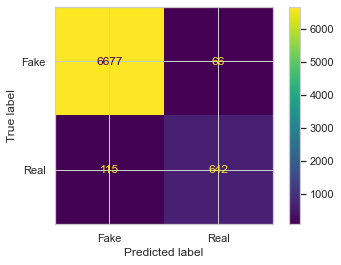

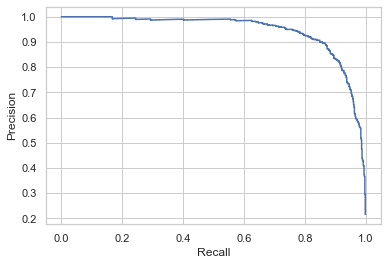

In [26]:
estimators=[  
    ('rf', RandomForestClassifier()),
    ('svc', SVC(kernel='linear',probability=True)), 
    ('dtc', DecisionTreeClassifier()),
    ('lr', LogisticRegression(random_state = 0, max_iter=1000))
    ]

clf = StackingClassifier(
    estimators=estimators, final_estimator=LogisticRegression()
)

clf.fit(X_Train, Y_Train).score(X_Test, Y_Test)
pred=clf.predict(X_Test)

#accuracy = accuracy_score(X_Test, pred)
pred_prob = clf.predict_proba(X_Test)[:,1]
pred_prob1 = clf.decision_function(X_Test)
print(pred_prob)
print(accuracy)

cm_PAC = confusion_matrix(Y_Test,pred, labels=['Fake','Real'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_PAC,display_labels=clf.classes_)
disp.plot()
plt.show()

precision, recall, _ = precision_recall_curve(Y_Test, pred_prob, pos_label='Real')
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()

0.9449333333333333
[0.10232341 0.24533332 0.07866366 ... 0.08675739 0.14707713 0.06130437]


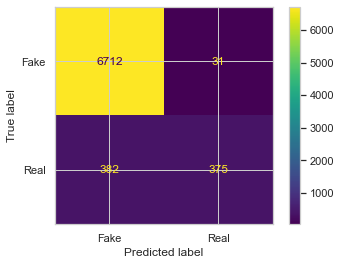

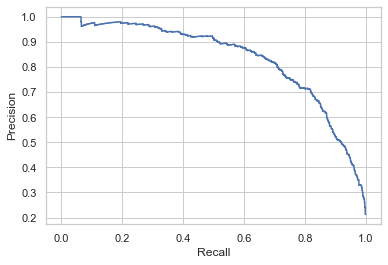

              precision    recall  f1-score   support

        Fake       0.95      1.00      0.97      6743
        Real       0.92      0.50      0.64       757

    accuracy                           0.94      7500
   macro avg       0.93      0.75      0.81      7500
weighted avg       0.94      0.94      0.94      7500



In [12]:
voting_classifier = VotingClassifier(estimators=[  
    ('rf', RandomForestClassifier()),
    ('svc', SVC(kernel='linear',probability=True)), 
    ('dtc', DecisionTreeClassifier()),
    ('lr', LogisticRegression(random_state = 0, max_iter=1000)),
    ('bc', BaggingClassifier(base_estimator=LogisticRegression(random_state=1), n_estimators=100,
                                 max_features=1.0,
                                 max_samples=100,
                                 random_state=42, n_jobs=5)),
    ('ab', AdaBoostClassifier()),
    ('gb', GradientBoostingClassifier(random_state=0))
    ], voting='soft')
voting_classifier.fit(X_Train, Y_Train)
# show_eval_scores(voting_classifier, test_data, 'Voting Classifier(soft) with TFIDF Vectorizer')
Y_Pred=voting_classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)
print(accuracy)

cm_PAC = confusion_matrix(Y_Test,Y_Pred, labels=['Fake','Real'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_PAC,display_labels=voting_classifier.classes_)
disp.plot()
pred_prob = voting_classifier.predict_proba(X_Test)[:,1]
print(pred_prob)
precision, recall, _ = precision_recall_curve(Y_Test, pred_prob, pos_label='Real')
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.show()
print(classification_report(Y_Test,Y_Pred))

0.9426666666666667
              precision    recall  f1-score   support

        Fake       0.94      1.00      0.97      6743
        Real       0.92      0.48      0.63       757

    accuracy                           0.94      7500
   macro avg       0.93      0.74      0.80      7500
weighted avg       0.94      0.94      0.93      7500



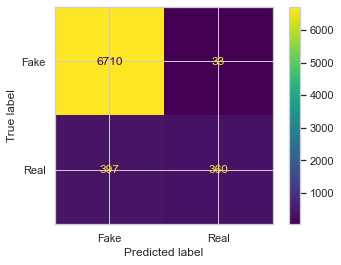

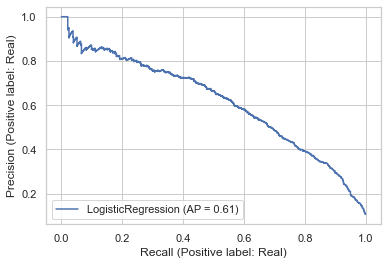

In [11]:
voting_classifier = VotingClassifier(estimators=[  
    ('rf', RandomForestClassifier()),
    ('svc', SVC(kernel='linear',probability=True)), 
    ('dtc', DecisionTreeClassifier()),
    ('lr', LogisticRegression(random_state = 0, max_iter=1000)),
    ('bc', BaggingClassifier(base_estimator=LogisticRegression(random_state=1), n_estimators=100,
                                 max_features=1.0,
                                 max_samples=100,
                                 random_state=42, n_jobs=5)),
    ('ab', AdaBoostClassifier()),
    ('gb', GradientBoostingClassifier(random_state=0))
    ], voting='hard', n_jobs=1)
voting_classifier.fit(X_Train, Y_Train)
# show_eval_scores(voting_classifier, test_data, 'Voting Classifier(soft) with TFIDF Vectorizer')
Y_Pred=voting_classifier.predict(X_Test)
accuracy = accuracy_score(Y_Test, Y_Pred)
print(accuracy)

cm_PAC = confusion_matrix(Y_Test,Y_Pred, labels=['Fake','Real'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm_PAC,display_labels=voting_classifier.classes_)
disp.plot()
PrecisionRecallDisplay.from_estimator(classifier,X_Test,Y_Test)
print(classification_report(Y_Test,Y_Pred))